In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
file=pd.read_excel('CollectedData.xlsx',sheet_name=1,header=None)
file.describe()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
count,11214.000000,11214.000000,9649.000000,12341.000000,12563.000000,12550.000000,9746.000000,12511.000000,11166.000000,4703.000000,...,11198.000000,12547.000000,11198.000000,11198.000000,12547.000000,12546.000000,12546.000000,12546.00000,1349.0,1349.0
mean,5.132067,244.402443,31.988384,0.615914,1990.924938,171.479841,869.834524,-0.117672,1.840498,1.616415,...,13.405786,18.271114,55.173592,81.748409,68.481532,18.743002,12.319998,15.53356,0.0,0.0
std,4.234976,389.099702,11.553433,0.574966,4.862250,118.343699,609.240369,1.144388,0.366160,0.486310,...,10.228297,10.613042,18.374220,14.414525,13.043434,12.800592,10.882898,11.62211,0.0,0.0
min,1.000000,1.000000,0.000000,-1.000000,1982.000000,3.000000,0.090278,-3.000000,1.000000,1.000000,...,-27.200000,-24.900000,6.100000,-2.200000,24.975000,-22.700000,-27.300000,-25.00000,0.0,0.0
25%,2.000000,24.000000,24.000000,0.000000,1987.000000,45.000000,15.000000,-1.000000,2.000000,1.000000,...,7.260000,12.100000,43.700000,74.000000,61.000000,9.400000,4.100000,6.75000,0.0,0.0
50%,3.000000,79.000000,31.000000,1.000000,1993.000000,171.000000,1055.000000,0.000000,2.000000,2.000000,...,13.600000,20.700000,57.400000,84.500000,69.500000,21.200000,12.300000,16.35000,0.0,0.0
75%,8.000000,217.000000,40.000000,1.000000,1995.000000,290.000000,1410.750000,0.700000,2.000000,2.000000,...,22.200000,27.150000,67.000000,93.460075,77.500000,30.000000,22.200000,25.40000,0.0,0.0
max,22.000000,2031.000000,99.000000,2.000000,1997.000000,365.000000,1930.000000,3.000000,2.000000,2.000000,...,28.900000,32.350000,100.000000,123.789573,100.350000,37.800000,33.200000,34.50000,0.0,0.0


In [3]:
#QUESTION 1
indexes=[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]
for i in indexes:
 print('\n\nInfo of Column',i)
 print('Data Type: ',file[i].dtypes)
 print('No of instances: ',file[i].count())
 print('No of Nulls: ',file[i].isnull().sum())

 q1=file[i].quantile(0.25)
 q3=file[i].quantile(0.75)
 iqr=q3-q1
 outliers = file[i][((file[i]<(q1-1.5*iqr)) | (file[i]>(q3+1.5*iqr)))]
 print('No of Outliers: ',len(outliers))

 print('Min value: ',file[i].min())
 print('Max value: ',file[i].max())
 print('Mode: ',file[i].mode())
 print('Mean: ',file[i].mean())
 print('Median: ',file[i].median())
 print('Variance: ',file[i].var())
 print('Standard Deviation: ',file[i].std())



Info of Column 2
Data Type:  float64
No of instances:  9649
No of Nulls:  2917
No of Outliers:  37
Min value:  0.0
Max value:  99.0
Mode:  0    24.0
Name: 2, dtype: float64
Mean:  31.988383943068364
Median:  31.0
Variance:  133.48181367240846
Standard Deviation:  11.55343298212304


Info of Column 21
Data Type:  float64
No of instances:  12509
No of Nulls:  57
No of Outliers:  356
Min value:  0.15
Max value:  2.13
Mode:  0    0.77
Name: 21, dtype: float64
Mean:  0.7545764248350931
Median:  0.72
Variance:  0.05173000183909021
Standard Deviation:  0.22744230441826388


Info of Column 18
Data Type:  float64
No of instances:  10679
No of Nulls:  1887
No of Outliers:  838
Min value:  0.9385665529010239
Max value:  4.5
Mode:  0    1.2
Name: 18, dtype: float64
Mean:  1.2049583072849963
Median:  1.2
Variance:  0.04908975424594645
Standard Deviation:  0.2215620776350196


Info of Column 25
Data Type:  float64
No of instances:  7665
No of Nulls:  4901
No of Outliers:  1
Min value:  -1.953
Max 



Histogram of Column 2


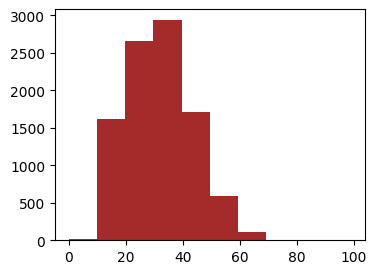



Boxplot of Column 2


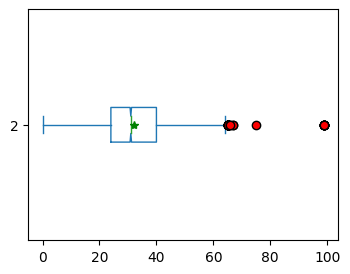



Histogram of Column 21


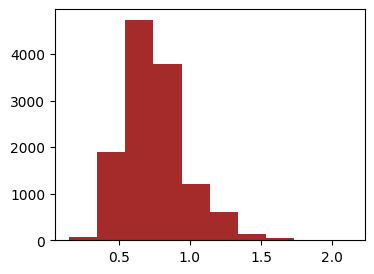



Boxplot of Column 21


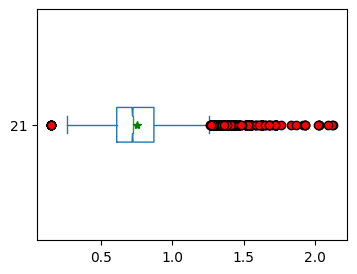



Histogram of Column 18


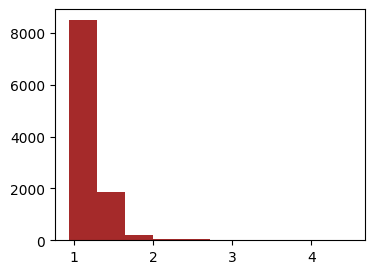



Boxplot of Column 18


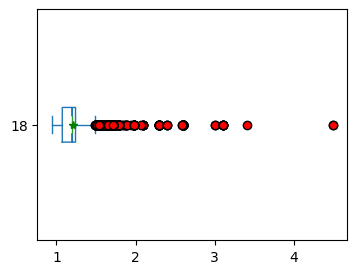



Histogram of Column 25


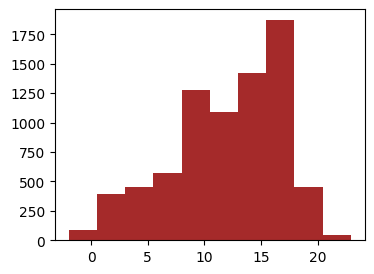



Boxplot of Column 25


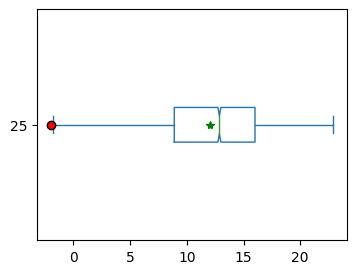



Histogram of Column 26


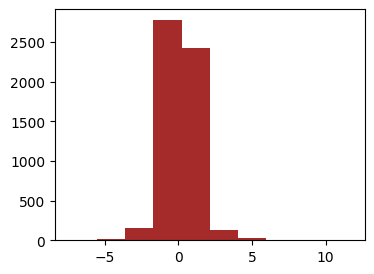



Boxplot of Column 26


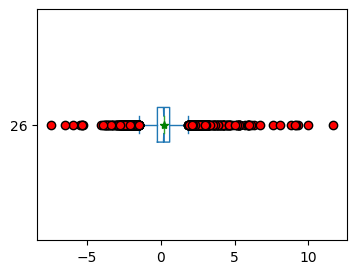



Histogram of Column 36


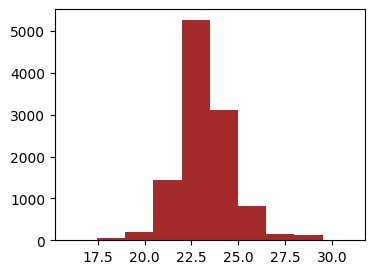



Boxplot of Column 36


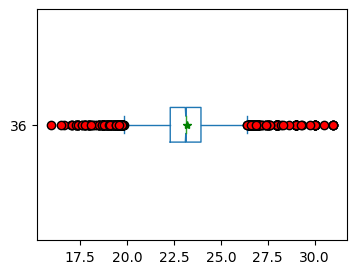



Histogram of Column 37


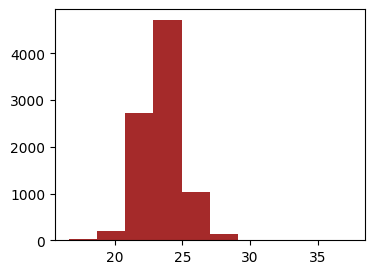



Boxplot of Column 37


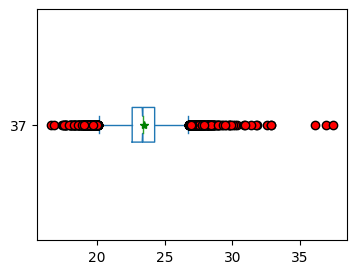



Histogram of Column 39


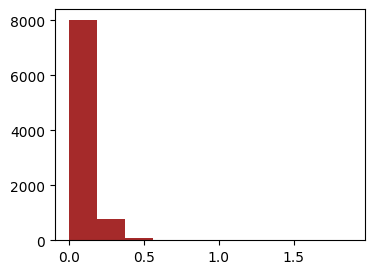



Boxplot of Column 39


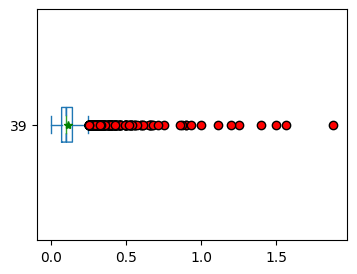



Histogram of Column 41


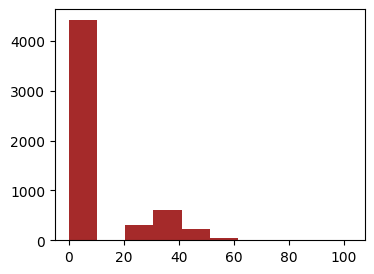



Boxplot of Column 41


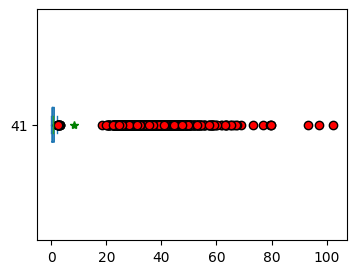



Histogram of Column 42


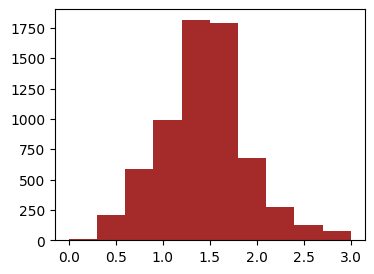



Boxplot of Column 42


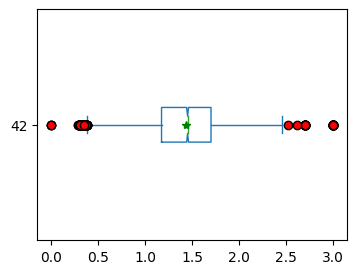



Histogram of Column 43


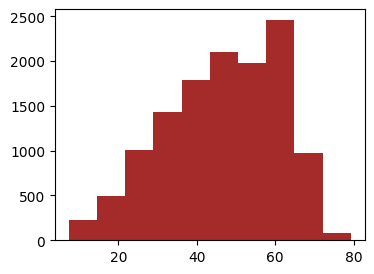



Boxplot of Column 43


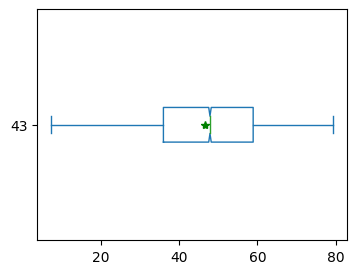



Histogram of Column 73


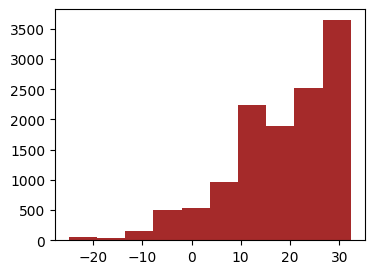



Boxplot of Column 73


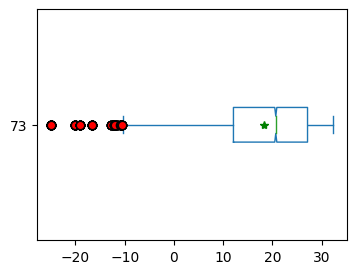



Histogram of Column 76


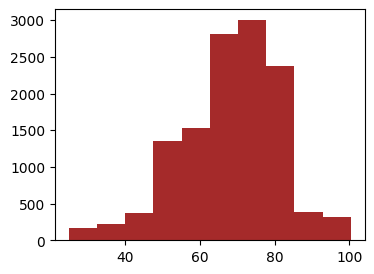



Boxplot of Column 76


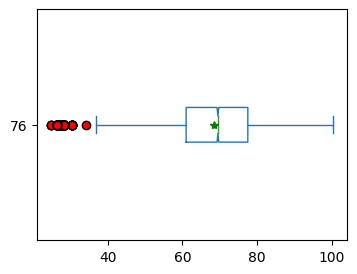



Histogram of Column 7


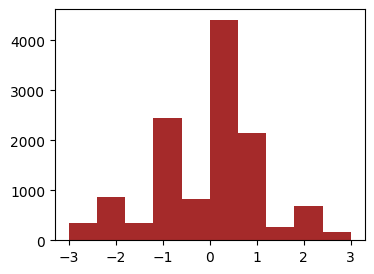



Boxplot of Column 7


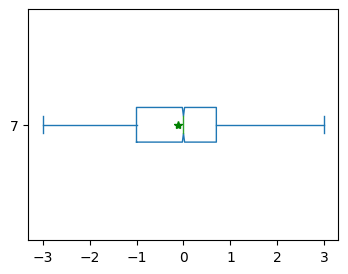



Histogram of Column 48


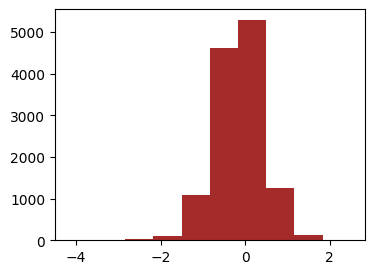



Boxplot of Column 48


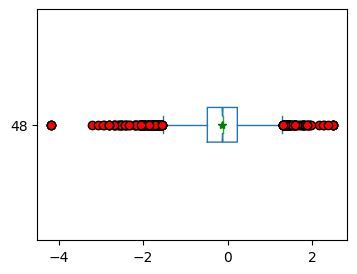

In [4]:
#QUESTION 2
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='*', markeredgecolor='green')
plt.rcParams["figure.figsize"] = (4, 3)
for i in indexes:
 print('\n\nHistogram of Column',i)
 plt.hist(file[i],color='brown')
 plt.show()
 print('\n\nBoxplot of Column',i)
 file[i].plot(kind='box',vert=False,flierprops=red_circle,showmeans=True,meanprops=mean_shape,notch=True)
 plt.show()

In [5]:
#QUESTION 3
m1=[21,18,26,36,37,39,41,42,]
for i in m1:
 file[i]=file[i].fillna(value=file[i].median())

m2=[2,25,43,73,76,7,48]
for i in m2:
 file[i]=file[i].fillna(value=file[i].mean())


In [6]:
#QUESTION 4
for i in indexes:
 q1=file[i].quantile(0.25)
 q3=file[i].quantile(0.75)
#print(q1,q3)
 iqr=q3-q1
 lower_limit = q1 - 1.5*iqr
 upper_limit = q3 + 1.5*iqr
#print(lower_limit,upper_limit)
 file[i] = np.where(file[i]>upper_limit,upper_limit,file[i])
 file[i] = np.where(file[i]<lower_limit,lower_limit,file[i])

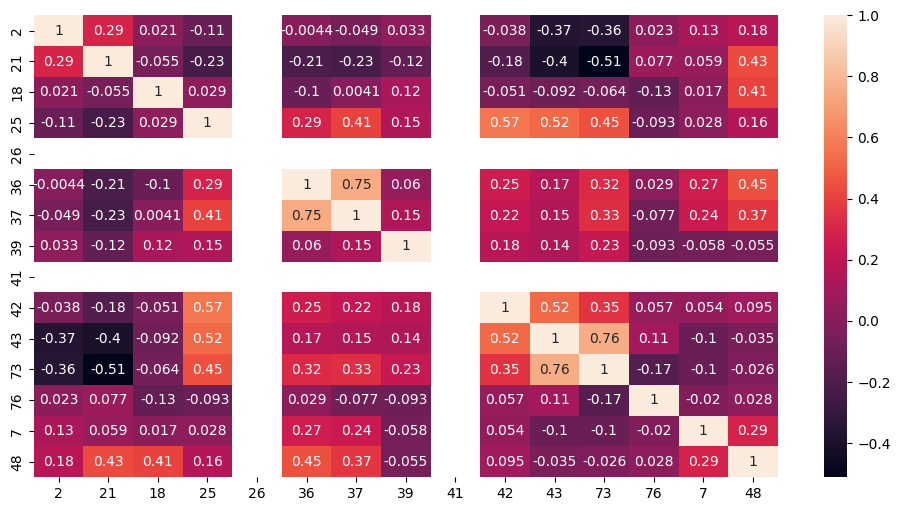

In [7]:
#QUESTION 6
import matplotlib.pyplot as plt
import seaborn as sns
dataset=file.iloc[:,[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]]
#dataset=file.iloc[:,['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']]

plt.rcParams["figure.figsize"] = (12, 6)
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [8]:
#QUESTION 7

indexes=[2,21,18,25,26,36,37,39,41,42,43,73,76]
for i in indexes:
    prob=file[i].value_counts(normalize=True)
    entropy=-1*(np.sum(np.log2(prob)*prob))
    print(entropy)
    

4.908375408580655
7.638439976270574
3.8288282977858317
6.010873977621857
-0.0
7.277023631091796
7.117887659012117
4.7231916782416254
-0.0
2.3931604366294517
11.033695402803515
8.050129413292769
7.427563573940873


In [9]:
#Applying Algorithms
#QUESTION 1 
def min_max_scaling(column):
    return ((column-column.min())/(column.max()-column.min())*(1-0)+0)

indexes=[2,25,36,43,73,76]
for i in indexes:   
 file[i]=min_max_scaling(file[i])



In [10]:
#QUESTION 2A
dataset=file.iloc[:,[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]]
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,0:13],
    dataset.iloc[:,-1],
    test_size=0.20,
    random_state=None)

feature_name=tuple(X_train.columns)
print(feature_name)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

# Sequential Forward Selection(sfs)
sfs1 = SFS(LinearRegression(),
         k_features='best',
         forward=True,
         floating=False,
         scoring='r2',
         cv = 0)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

(2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)
Training dataset shape: (10052, 13) (10052,)
Testing dataset shape: (2514, 13) (2514,)


{1: {'feature_idx': (5,),
  'cv_scores': array([0.19819846]),
  'avg_score': 0.1981984564282232,
  'feature_names': (36,)},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.48929019]),
  'avg_score': 0.48929018869699326,
  'feature_names': (21, 36)},
 3: {'feature_idx': (1, 2, 5),
  'cv_scores': array([0.7363983]),
  'avg_score': 0.7363983045878593,
  'feature_names': (21, 18, 36)},
 4: {'feature_idx': (1, 2, 5, 10),
  'cv_scores': array([0.76129517]),
  'avg_score': 0.7612951695001399,
  'feature_names': (21, 18, 36, 43)},
 5: {'feature_idx': (1, 2, 5, 7, 10),
  'cv_scores': array([0.77148819]),
  'avg_score': 0.7714881868668912,
  'feature_names': (21, 18, 36, 39, 43)},
 6: {'feature_idx': (1, 2, 5, 6, 7, 10),
  'cv_scores': array([0.77483201]),
  'avg_score': 0.7748320142301888,
  'feature_names': (21, 18, 36, 37, 39, 43)},
 7: {'feature_idx': (0, 1, 2, 5, 6, 7, 10),
  'cv_scores': array([0.7783044]),
  'avg_score': 0.7783044004988504,
  'feature_names': (2, 21, 18, 36, 37, 39, 4

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,0:13],
    dataset.iloc[:,-1],
    test_size=0.20,
    random_state=None)

feature_name=tuple(X_train.columns)
print(feature_name)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

# Sequential Backward Selection
sfs1 = SFS(LinearRegression(),
         k_features='best',
         forward=False,
         floating=False,
         scoring='r2',
         cv = 0)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

(2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)
Training dataset shape: (10052, 13) (10052,)
Testing dataset shape: (2514, 13) (2514,)


{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.78106568]),
  'avg_score': 0.7810656754099266,
  'feature_names': (2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
  'cv_scores': array([0.78106568]),
  'avg_score': 0.7810656754099266,
  'feature_names': (2, 21, 18, 25, 26, 36, 37, 39, 42, 43, 73, 76)},
 11: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12),
  'cv_scores': array([0.78106568]),
  'avg_score': 0.7810656754099266,
  'feature_names': (2, 21, 18, 25, 36, 37, 39, 42, 43, 73, 76)},
 10: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 10, 11, 12),
  'cv_scores': array([0.78106255]),
  'avg_score': 0.7810625495531324,
  'feature_names': (2, 21, 18, 25, 36, 37, 39, 43, 73, 76)},
 9: {'feature_idx': (0, 1, 2, 5, 6, 7, 10, 11, 12),
  'cv_scores': array([0.78086612]),
  'avg_score': 0.7808661238940424,
  'feature_names': (2, 21, 18, 36, 37, 39, 43, 73, 76)},
 8: {'feature_idx': (0, 1,

In [12]:
#QUESTION 3
#CONVERTING INTO DISCRETE
dataset[7]=pd.cut(dataset[7],bins=[-10,-2.5,-1.5,-0.5,0.5,1.5,2.5,10],labels=[-3,-2,-1,0,1,2,3])
dataset[7]=pd.to_numeric(dataset[7])
print(dataset[7])

0        2
1        2
2        1
3        3
4        3
        ..
12561   -2
12562   -2
12563   -1
12564    0
12565   -1
Name: 7, Length: 12566, dtype: int64


C:\Users\Moazzam Umer\AppData\Local\Temp\ipykernel_24564\1484204079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[7]=pd.cut(dataset[7],bins=[-10,-2.5,-1.5,-0.5,0.5,1.5,2.5,10],labels=[-3,-2,-1,0,1,2,3])
C:\Users\Moazzam Umer\AppData\Local\Temp\ipykernel_24564\1484204079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[7]=pd.to_numeric(dataset[7])


In [13]:
#QUESTION 3A
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,0:13],
    dataset[7],
    test_size=0.20,
    random_state=None)

feature_name=tuple(X_train.columns)
print(feature_name)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

# Sequential Forward Selection(sfs)
sfs1 = SFS(LGR(),
         k_features='best',
         forward=True,
         floating=False,
         scoring='accuracy',
         cv = 0)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

(2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)
Training dataset shape: (10052, 13) (10052,)
Testing dataset shape: (2514, 13) (2514,)


c:\Users\Moazzam Umer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Moazzam Umer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

{1: {'feature_idx': (6,),
  'cv_scores': array([0.38171508]),
  'avg_score': 0.3817150815758058,
  'feature_names': (37,)},
 2: {'feature_idx': (6, 11),
  'cv_scores': array([0.39186232]),
  'avg_score': 0.3918623159570235,
  'feature_names': (37, 73)},
 3: {'feature_idx': (0, 6, 11),
  'cv_scores': array([0.39186232]),
  'avg_score': 0.3918623159570235,
  'feature_names': (2, 37, 73)},
 4: {'feature_idx': (0, 2, 6, 11),
  'cv_scores': array([0.39703542]),
  'avg_score': 0.39703541583764423,
  'feature_names': (2, 18, 37, 73)},
 5: {'feature_idx': (0, 2, 5, 6, 11),
  'cv_scores': array([0.39803024]),
  'avg_score': 0.3980302427377636,
  'feature_names': (2, 18, 36, 37, 73)},
 6: {'feature_idx': (0, 2, 5, 6, 9, 11),
  'cv_scores': array([0.40021886]),
  'avg_score': 0.40021886191802625,
  'feature_names': (2, 18, 36, 37, 42, 73)},
 7: {'feature_idx': (0, 2, 5, 6, 8, 9, 11),
  'cv_scores': array([0.40210903]),
  'avg_score': 0.40210903302825307,
  'feature_names': (2, 18, 36, 37, 41, 42,

In [14]:
#QUESTION 3B
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,0:13],
    dataset[7],
    test_size=0.20,
    random_state=None)

feature_name=tuple(X_train.columns)
print(feature_name)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

sfs1 = SFS(LGR(),
         k_features='best',
         forward=False,
         floating=False,
         scoring='accuracy',
         cv = 0)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

(2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)
Training dataset shape: (10052, 13) (10052,)
Testing dataset shape: (2514, 13) (2514,)


c:\Users\Moazzam Umer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Moazzam Umer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.40240748]),
  'avg_score': 0.4024074810982889,
  'feature_names': (2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)},
 12: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.40569041]),
  'avg_score': 0.4056904098686828,
  'feature_names': (2, 21, 18, 26, 36, 37, 39, 41, 42, 43, 73, 76)},
 11: {'feature_idx': (0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12),
  'cv_scores': array([0.40539196]),
  'avg_score': 0.40539196179864706,
  'feature_names': (2, 21, 18, 26, 36, 37, 41, 42, 43, 73, 76)},
 10: {'feature_idx': (0, 1, 2, 4, 5, 6, 9, 10, 11, 12),
  'cv_scores': array([0.40529248]),
  'avg_score': 0.4052924791086351,
  'feature_names': (2, 21, 18, 26, 36, 37, 42, 43, 73, 76)},
 9: {'feature_idx': (0, 1, 2, 5, 6, 9, 10, 11, 12),
  'cv_scores': array([0.40509351]),
  'avg_score': 0.40509351372861124,
  'feature_names': (2, 21, 18, 36, 37, 42, 43, 73, 76)},
 8: {'feature_idx': (0, 

In [15]:
#QUESTION 4
optimal_pmv_features = dataset.iloc[:,[0,1,2,5,6,7,10,11]]
X_train, X_test, y_train, y_test = train_test_split(
    optimal_pmv_features.iloc[:,0:-1],
    dataset[48],
    test_size=0.20,
    random_state=None)

sfs1 = SFS(LinearRegression(),
         k_features='best',
         forward=True,
         floating=False,
         scoring='r2',
         cv = 3)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.1926491 , 0.2100473 , 0.20108085]),
  'avg_score': 0.20125908165954462,
  'feature_names': (36,)},
 2: {'feature_idx': (1, 3),
  'cv_scores': array([0.50283792, 0.49176867, 0.49042015]),
  'avg_score': 0.49500891139641284,
  'feature_names': (21, 36)},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.75246907, 0.7346742 , 0.74124654]),
  'avg_score': 0.7427966059957504,
  'feature_names': (21, 18, 36)},
 4: {'feature_idx': (1, 2, 3, 6),
  'cv_scores': array([0.77903253, 0.75525848, 0.7683439 ]),
  'avg_score': 0.7675449692235411,
  'feature_names': (21, 18, 36, 43)},
 5: {'feature_idx': (1, 2, 3, 5, 6),
  'cv_scores': array([0.78996748, 0.76523495, 0.77833895]),
  'avg_score': 0.7778471264419075,
  'feature_names': (21, 18, 36, 39, 43)},
 6: {'feature_idx': (1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.79281109, 0.77001889, 0.78206176]),
  'avg_score': 0.7816305814255315,
  'feature_names': (21, 18, 36, 37, 39, 43)},
 7: {'feature_i

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    optimal_pmv_features.iloc[:,0:-1],
    dataset[48],
    test_size=0.20,
    random_state=None)
regr=LinearRegression()
regr.fit(X_train,y_train)
coefficients=regr.coef_
intercept=regr.intercept_

print("Slope: ",coefficients)
print("Intercept : ",intercept)

Slope:  [ 0.17268537  1.63751395  2.5262381   1.31783531  0.05318369 -1.64000335
  0.56006994]
Intercept :  -6.461558259465969


In [17]:
optimal_amv_features = dataset.iloc[:,[0,1,2,5,11,12]]
X_train, X_test, y_train, y_test = train_test_split(
    optimal_amv_features.iloc[:,0:-1],
    dataset[7],
    test_size=0.20,
    random_state=None)

sfs1 = SFS(LGR(),
         k_features='best',
         forward=True,
         floating=False,
         scoring='accuracy',
         cv = 3)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

c:\Users\Moazzam Umer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Moazzam Umer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

{1: {'feature_idx': (1,),
  'cv_scores': array([0.3846613 , 0.3846613 , 0.38477612]),
  'avg_score': 0.3846995698915152,
  'feature_names': (21,)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.38645181, 0.38615339, 0.38985075]),
  'avg_score': 0.3874853129161711,
  'feature_names': (2, 21)},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.3945091 , 0.3945091 , 0.38597015]),
  'avg_score': 0.39166278425835604,
  'feature_names': (2, 21, 36)},
 4: {'feature_idx': (0, 1, 3, 4),
  'cv_scores': array([0.39540436, 0.40376007, 0.38985075]),
  'avg_score': 0.39633839159915135,
  'feature_names': (2, 21, 36, 73)},
 5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.39510594, 0.39958221, 0.39552239]),
  'avg_score': 0.3967368469499711,
  'feature_names': (2, 21, 18, 36, 73)}}

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    optimal_amv_features.iloc[:,0:-1],
    dataset[7],
    test_size=0.20,
    random_state=None)

logr=LGR()
logr.fit(X_train,y_train)

slope=logr.coef_
intcpt=logr.intercept_

print("slope: ",slope)
print("intercept: ",intcpt)


slope:  [[-1.45087478  0.79462094 -0.13396471 -3.35491229  1.78216475]
 [-1.06810105 -0.38615436 -0.01466412 -2.39220201  1.50871517]
 [ 0.33037278 -0.27215239 -0.6837275  -1.45644513  0.63043501]
 [ 0.87108013 -0.17092065 -0.68690614  0.09405197 -0.45634523]
 [ 0.44585991  0.32180764  0.40816445  1.8099469  -0.58130677]
 [-0.04008128  0.22548661  1.19133228  2.49753069 -1.40351344]
 [ 0.91174429 -0.51268779 -0.08023426  2.80202988 -1.48014949]]
intercept:  [-0.46934865  1.06174907  2.30263852  2.40242574 -0.58061112 -2.16078372
 -2.55606985]


c:\Users\Moazzam Umer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
y_pred=logr.predict(X_test)

In [20]:

c_matrix=confusion_matrix(y_test,y_pred)
print(c_matrix)
accuracy=accuracy_score(y_pred,y_test)
print("accuracy : ",accuracy)

[[  0   0  26  47   0   0   0]
 [  0   0  57 192   1   0   0]
 [  0   0  99 513   2   0   0]
 [  0   0  64 878  17   0   0]
 [  0   0  13 420  18   0   0]
 [  0   0   5 126  15   0   0]
 [  0   0   1  18   2   0   0]]
accuracy :  0.39578361177406524
